In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
#from scipy.interpolate import RegularGridInterpolator as rgi
from skimage.morphology import binary_erosion
from matplotlib.colors import ListedColormap
import math


from Astar_netcdf import AStarPlanner
import time
show_animation = False

In [2]:
data = xr.open_dataset('med-hcmr-wav-an-fc-h_1637573239403.nc')  # wave height 22 november
data_stat = xr.open_dataset('MED-MFC_006_017_mask_bathy.nc')
mask = data_stat.variables['mask'][0,:,:]
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
times = data.variables['time'][:]
wave = data.variables['VHM0'][:]
data

<xarray.Dataset>
Dimensions:    (latitude: 380, time: 24, longitude: 1307)
Coordinates:
  * latitude   (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time       (time) datetime64[ns] 2021-11-22 ... 2021-11-22T23:00:00
  * longitude  (longitude) float32 -18.12 -18.08 -18.04 ... 36.21 36.25 36.29
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/15)
    bulletin_type:                   forecast
    institution:                     Hellenic Centre for Marine Research (HCM...
    source:                          MEDWAM3
    credit:                          Copernicus Marine Environment Monitoring...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    producer:                        CMEMS-MED Monitoring and Forecasting Centre
    ...                              ...
    area:                            MED
    bulletin_date:                   2021-11-21 12
    FROM_ORIGINAL_FILE__field_type:  hourly_instantaneous_at_time_field
    title:                           Wave fields (2D) - Hourly Instantaneous
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [3]:
len(lats)
print(lats[1]-lats[0])
print(lons[1]-lons[0])
#lons.values[lons.values >15]

<xarray.Variable ()>
array(0.04166603, dtype=float32)
<xarray.Variable ()>
array(0.04166603, dtype=float32)


<ipython-input-4-68214224f4c4>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')


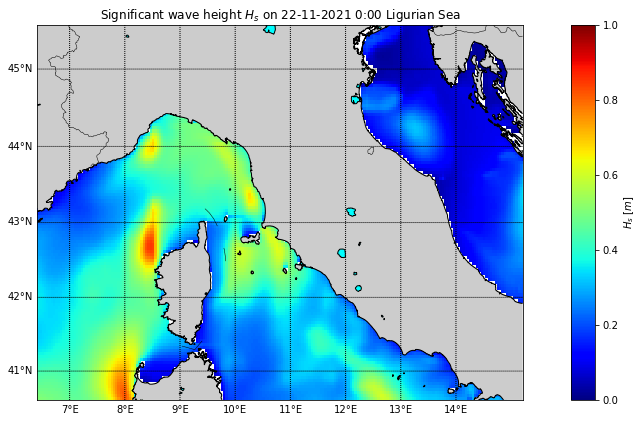

In [4]:
plt.figure(1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=lons.values[589], 
             llcrnrlat=lats.values[250],
             urcrnrlon=lons.values[800],  
             urcrnrlat=lats.values[369],  
             resolution='f')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes

cbar = mp.colorbar(c_scheme, location='right', pad='10%')
plt.clim(0, 1)
cbar.set_label('$H_s$ $[m]$')

plt.title('Significant wave height $H_s$ on 22-11-2021 0:00 Ligurian Sea')
plt.show()

<ipython-input-5-257834eeb6cd>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')


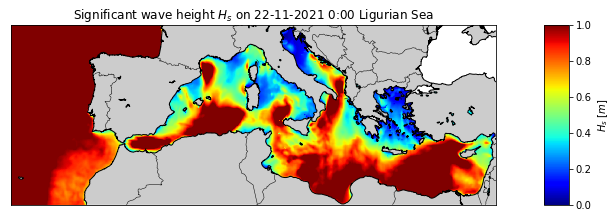

In [5]:
plt.figure(1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=lons.values[0], 
             llcrnrlat=lats.values[0],
             urcrnrlon=lons.values[-1],  
             urcrnrlat=lats.values[-1],  
             resolution='i')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location='right', pad='10%')
plt.clim(0, 1)
cbar.set_label('$H_s$ $[m]$')

plt.title('Significant wave height $H_s$ on 22-11-2021 0:00 Ligurian Sea')
plt.show()

In [6]:
l = 5 
cost = np.zeros_like(wave[:l])
contour_raw_meteo = np.zeros_like(wave[:l])
contour_raw_land = np.logical_xor(mask,binary_erosion(mask)) 
for i in range(l):
    cost[i] = 100 * (np.array(wave[i]) >0.5)
    contour_raw_meteo[i]=np.logical_xor(cost[i],binary_erosion(cost[i]))

In [7]:
print(lons.values[650], lons.values[711])
print(lats.values[268], lats.values[314])
print(lats.values[300]-lats.values[299])
print(lons.values[700]-lons.values[699])

8.958334 11.500001
41.354168 43.270832
0.04166794
0.041666985


<ipython-input-17-85b6db7f1d64>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))


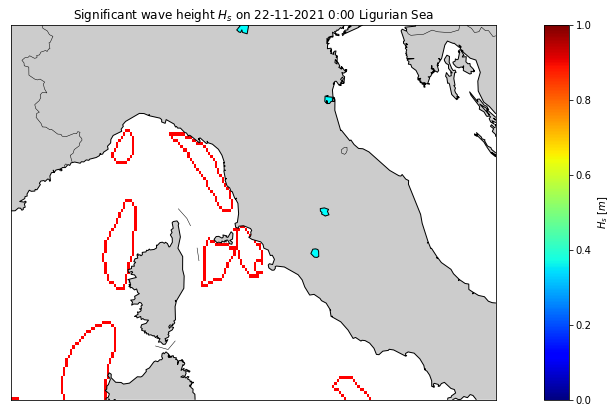

In [17]:
plt.figure(1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=lons.values[589], 
             llcrnrlat=lats.values[250],
             urcrnrlon=lons.values[800],  
             urcrnrlat=lats.values[369], 
             resolution='i')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.title('Significant wave height $H_s$ on 22-11-2021 0:00 Ligurian Sea')
plt.show()

In [9]:
oxland, oyland = [], []
x_obsl, y_obsl = [], []
Cspacex, Cspacey = [], []

oxmeteo, oymeteo = [[] for i in range(l)], [[] for i in range(l)]     # all meteo points
x_obsm, y_obsm = [[] for i in range(l)], [[] for i in range(l)]       # contour meteo points
oxmeteo_, oymeteo_ = [[] for i in range(l)], [[] for i in range(l)]   # all meteo points
x_obsm_, y_obsm_ = [[] for i in range(l)], [[] for i in range(l)]     # contour meteo points

for i in range(l):
    for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]: 
                if cost[i][k][j] == 100:
                    oxmeteo[i].append(lons.values[j])
                    oymeteo[i].append(lats.values[k])
                if contour_raw_meteo[i][k][j]:
                    x_obsm[i].append(lons.values[j])
                    y_obsm[i].append(lats.values[k])
    oxmeteo_[i], oymeteo_[i] = mp(oxmeteo[i], oymeteo[i])   # meteo points
    x_obsm_[i], y_obsm_[i] = mp(x_obsm[i], y_obsm[i])       # meteo contour points

# land is always static    
for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]:                      
                if contour_raw_land[k][j]: 
                    x_obsl.append(lons.values[j])
                    y_obsl.append(lats.values[k])
                if mask.values[k][j] == 0:
                    oxland.append(lons.values[j])
                    oyland.append(lats.values[k])
                if mask.values[k][j] == 1:
                    Cspacex.append(lons.values[j])
                    Cspacey.append(lats.values[k])
    
Cspacex_, Cspacey_ = mp(Cspacex, Cspacey)
x_obsl_, y_obsl_ = mp(x_obsl, y_obsl)       # coastline points
oxland_, oyland_ = mp(oxland, oyland)       # land points
# x_obstot_ = x_obsm_ + x_obsl_
# y_obstot_ = y_obsm_ + y_obsl_

In [26]:
len(x_obsm[1])

79

In [10]:
ox_a_list = [[] for i in range(l)]
oy_a_list = [[] for i in range(l)]
for i in range(l):
    for j, _ in enumerate(x_obsm[i]):
        ox_a_list[i].append(x_obsm[i][j])
        oy_a_list[i].append(y_obsm[i][j])
    for k, _ in enumerate(x_obsl):
        ox_a_list[i].append(x_obsl[k])
        oy_a_list[i].append(y_obsl[k])

In [21]:
xspace = lons.values[650:712]
yspace = lats.values[268:315]
xs, ys = np.meshgrid(xspace, xspace)

x_min, y_min = mp(xspace[0], yspace[0])    # lons.values[650], lats.values[268]
x_max, y_max = mp(xspace[-1], yspace[-1])   # lons.values[711], lats.values[314]
print("The area of movement is:")
print("x_min = {}, y_min = {}\nx_max = {}, y_max = {}".format(x_min, y_min, x_max, y_max))

sx = xspace[12]  # 9.416668
sy = yspace[42]  # 43.104168
gx = xspace[56]   # 11.291668
gy = yspace[22]   # 42.270832

sx_a, sy_a = mp(sx, sy)
gx_a, gy_a = mp(gx, gy)
print("START is at ({}°,{}°), GOAL is at ({}°,{}°)".format(sx, sy, gx, gy))

The area of movement is:
x_min = 282620.28779961535, y_min = 110468.06197360996
x_max = 565240.6286210786, y_max = 398709.0083373049
START is at (9.458333969116211°,43.10416793823242°), GOAL is at (11.291667938232422°,42.27083206176758°)


In [12]:
# astar_map = [[[0.0 for k in range(len(xspace))] for j in range(len(yspace))] for i in range(l)]
# for i in range(l):
#     for ix in range(len(xspace)):
#         for iy in range(len(yspace)):
#             for q, _ in enumerate(ox_a_list[i]):
#                 d = math.hypot(ox_a_list[i][q] - xs[iy][ix], oy_a_list[i][q] - ys[iy][ix])
#                 if d <= robot_radius:
#                     astar_map[i][iy][ix] = True
#                     break 
grid_size = 0.04166
robot_radius = grid_size

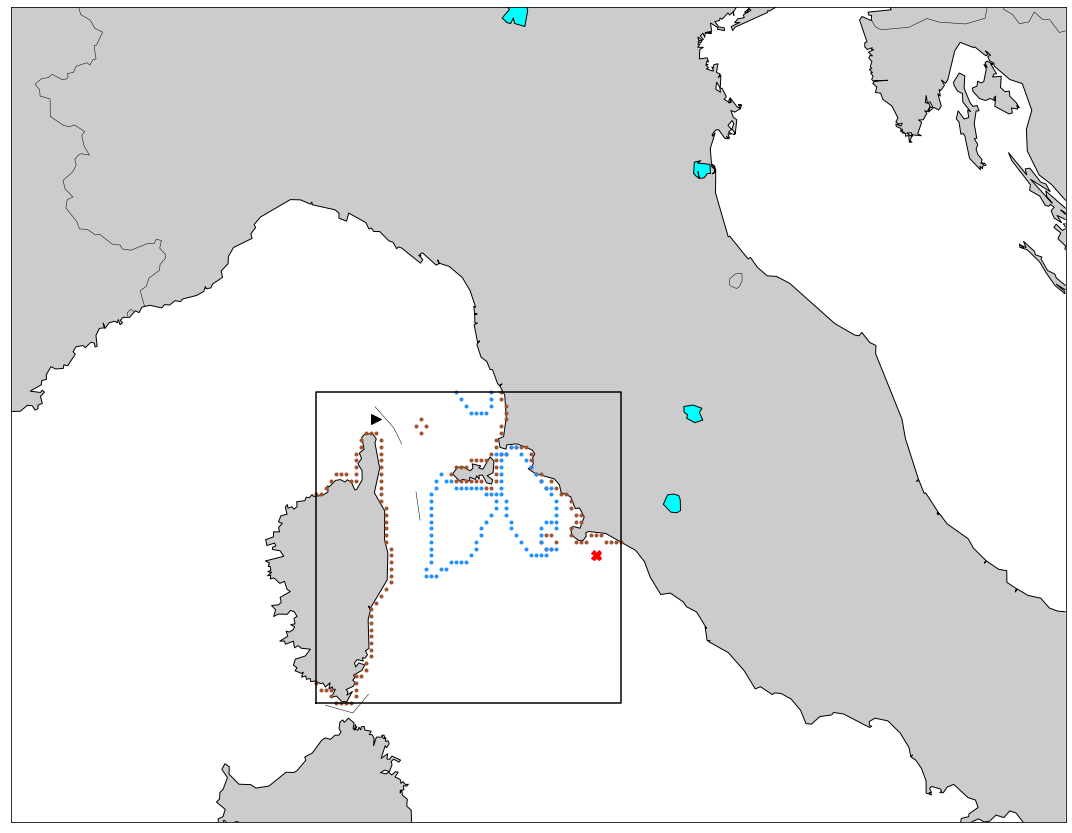

In [13]:
plt.figure(1, figsize=(20, 15))
plt.plot(sx_a, sy_a, ">k", markersize=10)
plt.plot(gx_a, gy_a, "Xr", markersize=10)
plt.plot(x_obsl_, y_obsl_, '.', color="sienna")
plt.plot(x_obsm_[0], y_obsm_[0], '.', color="dodgerblue")

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
plt.show()

In [14]:
start_time = time.time()
a_star = AStarPlanner(ox_a_list, oy_a_list, grid_size, robot_radius, xspace[0], yspace[0], xspace[-1], yspace[-1])
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))

min_x: 8.958333969116211°
min_y: 41.35416793823242°
max_x: 11.500000953674316°
max_y: 43.27083206176758°
x_width: 62
y_width: 47


Find goal
Computational time is 20.349743127822876


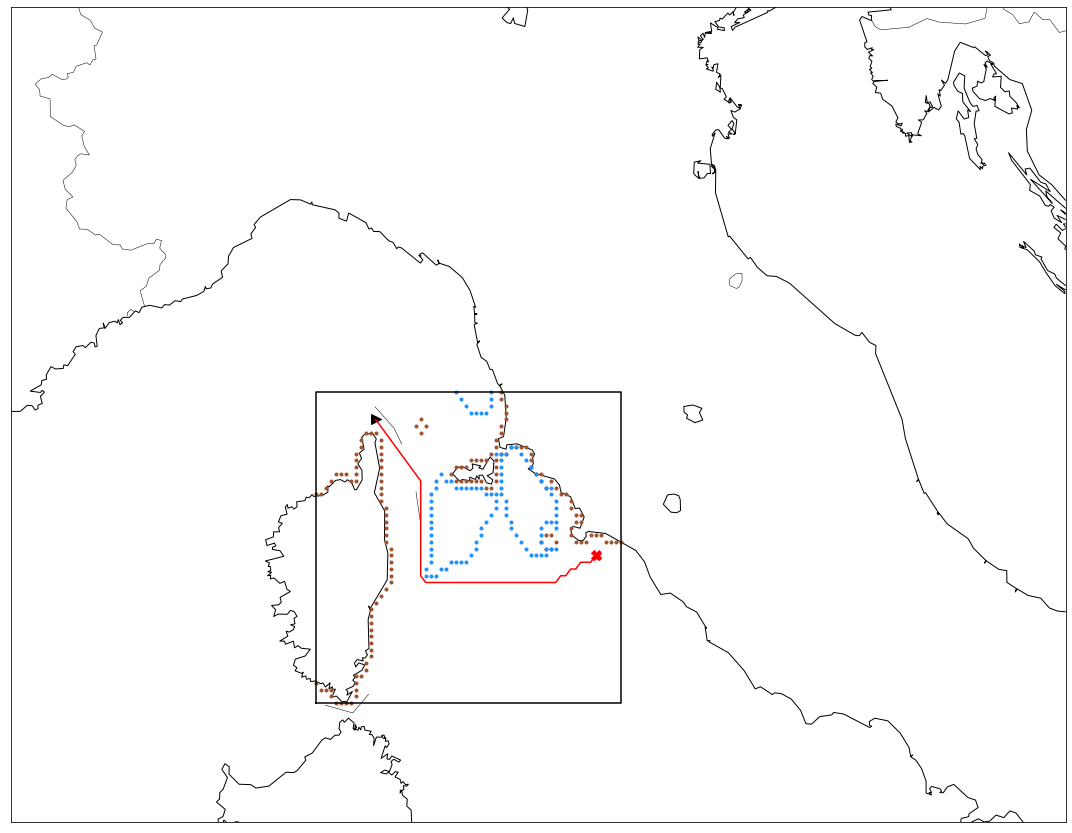

In [23]:
rx_, ry_ = mp(rx, ry)
plt.figure(1, figsize=(20, 15))
mp.plot(sx_a, sy_a, ">k", markersize=10)
mp.plot(gx_a, gy_a, "Xr", markersize=10)
plt.plot(x_obsl_, y_obsl_, '.', color="sienna")
plt.plot(x_obsm_[0], y_obsm_[0], '.', color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.plot(rx_, ry_, '-r')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()